In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2]:
data=pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


1. Understand nature of the data .info() .describe()
2. Histograms aand boxplots
3. Value counts
4. Correlation between the metrics
5. Exploring interesting themes
	As in the case of the titanic comp
	i. Wealthy survive?
	ii. By location
	iii. Age scatterplot with ticket price
6. Feature engineering
7. Preprocess data together or use a transformer?
	i. Use label for train or test
8. Scaling
9. Model Baseline
10. Model comparison with CV

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [5]:
data.isna().sum(),(data.isna().sum()/len(data))*100

(longitude               0
 latitude                0
 housing_median_age      0
 total_rooms             0
 total_bedrooms        207
 population              0
 households              0
 median_income           0
 median_house_value      0
 ocean_proximity         0
 dtype: int64,
 longitude             0.000000
 latitude              0.000000
 housing_median_age    0.000000
 total_rooms           0.000000
 total_bedrooms        1.002907
 population            0.000000
 households            0.000000
 median_income         0.000000
 median_house_value    0.000000
 ocean_proximity       0.000000
 dtype: float64)

We need to drop the null or empty row as this just only contribute around 1% to the data. So, no information would be lost

In [6]:
data_new=data.dropna(axis=0)

In [7]:
data_new.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
data_new.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [9]:
num_cols=data_new[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]

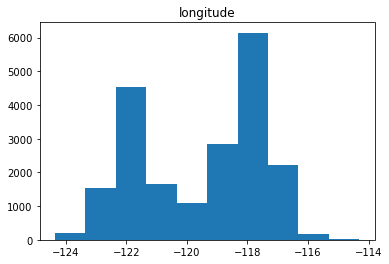

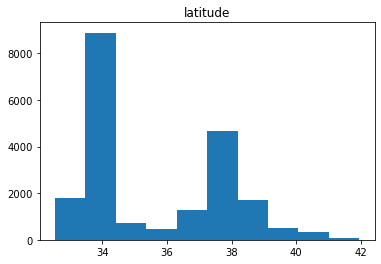

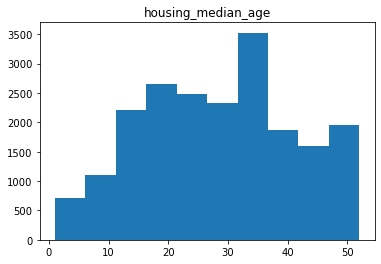

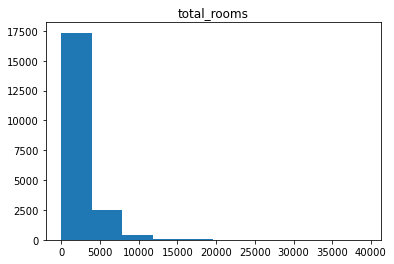

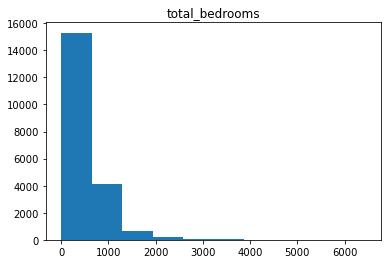

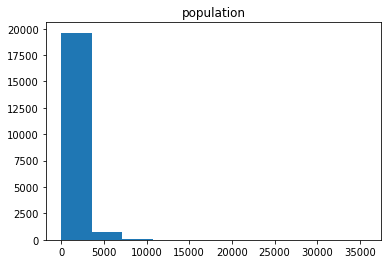

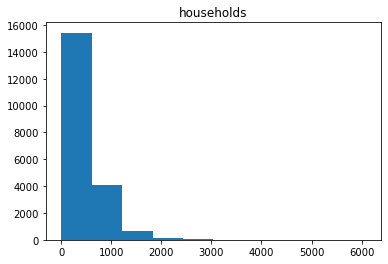

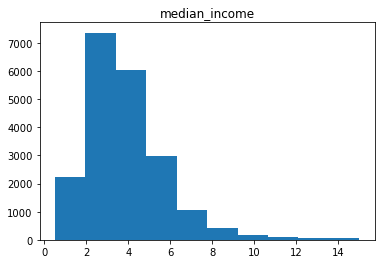

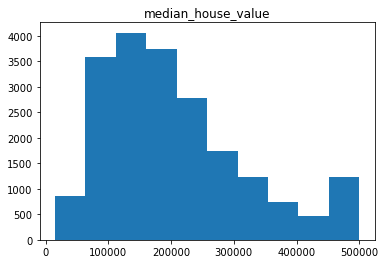

In [10]:
for cols in num_cols.columns:
    plt.hist(num_cols[cols])
    plt.title(cols)
    plt.show()

From the histogram plots, we can see that the total rooms, total bedrooms, population, households and median income are not normally distributed as a result of outliers. 
While, longitude, latitude, housing median age and median house value are normally distributed

<AxesSubplot:>

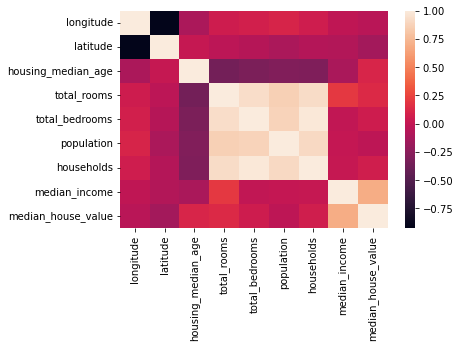

In [11]:
sns.heatmap(data_new.corr())

In [12]:
data_new.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [13]:
data_new['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
data_new.groupby(['ocean_proximity']).mean()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.848642,34.560734,29.277397,2627.233451,546.539185,1518.440447,517.419083,4.231101,240267.990812
INLAND,-119.733085,36.731806,24.262623,2721.252925,533.881619,1392.411484,478.006927,3.210359,124896.863147
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.261035,37.801304,37.756388,2490.335242,514.182819,1227.881057,487.236123,4.175647,259279.292070
NEAR OCEAN,-119.329836,34.736065,29.314688,2587.165525,538.615677,1355.637367,501.528919,4.006374,249042.355023


(array([2.000e+00, 1.000e+01, 5.000e+01, 1.100e+02, 2.890e+02, 1.353e+03,
        9.427e+03, 8.020e+03, 1.080e+03, 9.200e+01]),
 array([ 1.09861229,  2.04670246,  2.99479263,  3.9428828 ,  4.89097298,
         5.83906315,  6.78715332,  7.73524349,  8.68333366,  9.63142383,
        10.57951401]),
 <BarContainer object of 10 artists>)

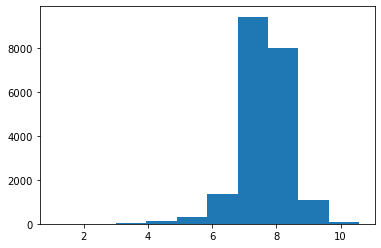

In [15]:
data_new['total_rooms']=np.log(data_new.total_rooms+1)
plt.hist(data_new['total_rooms'])

(array([8.0000e+00, 3.9000e+01, 7.9000e+01, 1.6100e+02, 4.6600e+02,
        2.7850e+03, 1.0342e+04, 5.5420e+03, 9.3200e+02, 7.9000e+01]),
 array([0.69314718, 1.50095397, 2.30876076, 3.11656755, 3.92437433,
        4.73218112, 5.53998791, 6.3477947 , 7.15560149, 7.96340827,
        8.77121506]),
 <BarContainer object of 10 artists>)

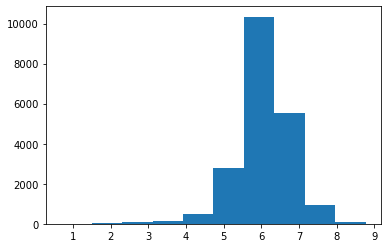

In [16]:
data_new['total_bedrooms']=np.log(data_new.total_bedrooms+1)
plt.hist(data_new['total_bedrooms'])

(array([7.000e+00, 2.500e+01, 1.040e+02, 2.230e+02, 8.070e+02, 6.052e+03,
        1.068e+04, 2.327e+03, 2.020e+02, 6.000e+00]),
 array([ 1.38629436,  2.29590789,  3.20552142,  4.11513495,  5.02474848,
         5.93436201,  6.84397554,  7.75358907,  8.6632026 ,  9.57281613,
        10.48242966]),
 <BarContainer object of 10 artists>)

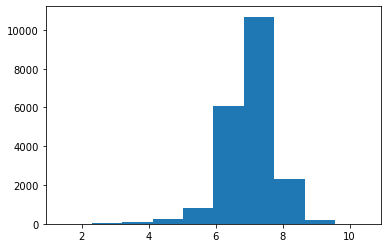

In [17]:
data_new['population']=np.log(data_new.population+1)
plt.hist(data_new['population'])

(array([8.0000e+00, 3.4000e+01, 9.6000e+01, 1.8300e+02, 5.4000e+02,
        2.8850e+03, 1.0463e+04, 5.3300e+03, 8.2400e+02, 7.0000e+01]),
 array([0.69314718, 1.49515779, 2.2971684 , 3.09917901, 3.90118962,
        4.70320023, 5.50521084, 6.30722145, 7.10923206, 7.91124266,
        8.71325327]),
 <BarContainer object of 10 artists>)

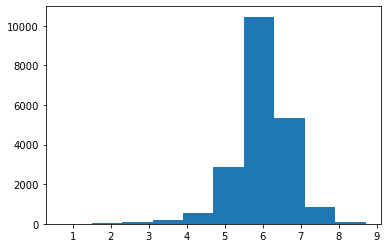

In [18]:
data_new['households']=np.log(data_new.households+1)
plt.hist(data_new['households'])

(array([  96.,  529., 2008., 4052., 5305., 4617., 2546.,  875.,  279.,
         126.]),
 array([0.40539844, 0.64211809, 0.87883775, 1.1155574 , 1.35227705,
        1.58899671, 1.82571636, 2.06243601, 2.29915567, 2.53587532,
        2.77259497]),
 <BarContainer object of 10 artists>)

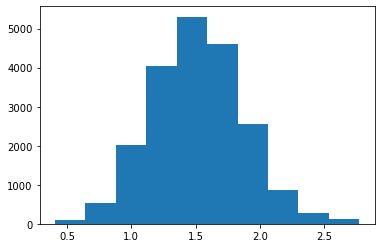

In [19]:
data_new['median_income']=np.log(data_new.median_income+1)
plt.hist(data_new.median_income)

In [20]:
data_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,NEAR BAY
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,NEAR BAY
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,NEAR BAY
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,341300.0,NEAR BAY
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,342200.0,NEAR BAY


we need to drop longitude and latitude column and rearrange the columns to have our target(median_house_value) as the last column

In [21]:
data_new=data_new.drop(['longitude','latitude'], axis=1)

In [22]:
data_new.columns.values

array(['housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'], dtype=object)

In [23]:
data_new_numcols=data_new[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income']]

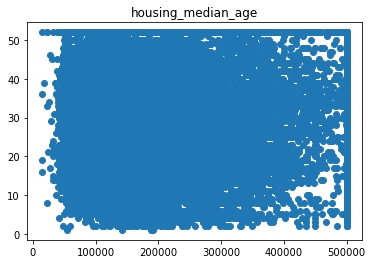

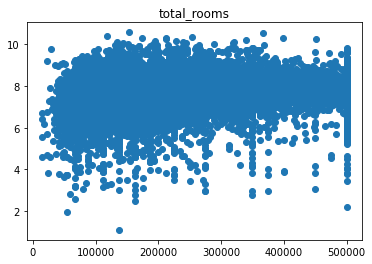

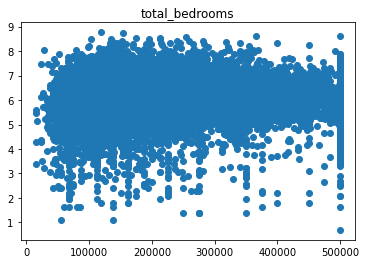

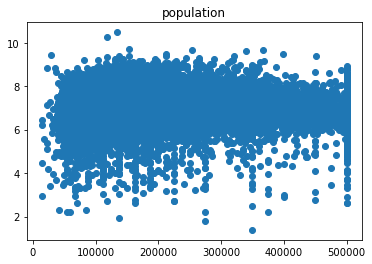

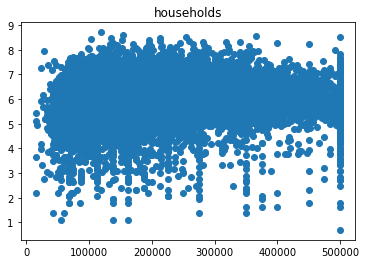

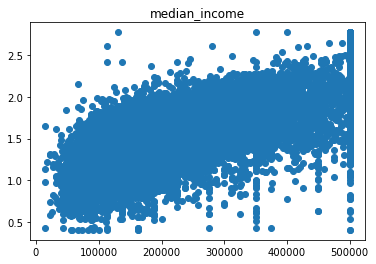

In [24]:
for i in data_new_numcols:
    plt.scatter(y=data_new_numcols[i],x=data_new['median_house_value'])
    plt.title(i)
    plt.show()

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_new[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns

In [26]:
vif

,VIF,features
0,5.465484,housing_median_age
1,1782.265337,total_rooms
2,2696.058997,total_bedrooms
3,617.032446,population
4,1978.010145,households
5,41.690791,median_income


In [27]:
cols=['median_house_value','housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income','ocean_proximity']

In [28]:
data_real=data_new[cols]
data_real.head(10)

,median_house_value,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,452600.0,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,NEAR BAY
1,358500.0,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,NEAR BAY
2,352100.0,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,NEAR BAY
3,341300.0,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,NEAR BAY
4,342200.0,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,NEAR BAY
5,269700.0,52.0,6.824374,5.365976,6.025866,5.267858,1.616771,NEAR BAY
6,299200.0,52.0,7.838343,6.194405,6.998510,6.244167,1.538822,NEAR BAY
7,241400.0,52.0,8.040769,6.533789,7.054450,6.473891,1.415853,NEAR BAY
8,226700.0,42.0,7.846199,6.501290,7.095893,6.390241,1.125059,NEAR BAY
9,261100.0,52.0,8.174703,6.562444,7.347300,6.572283,1.545688,NEAR BAY


In [29]:
data_real=pd.get_dummies(data_real, drop_first=True)
data_real.head(10)

,median_house_value,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,452600.0,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,0,0,1,0
1,358500.0,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,0,0,1,0
2,352100.0,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,0,0,1,0
3,341300.0,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,0,0,1,0
4,342200.0,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,0,0,1,0
5,269700.0,52.0,6.824374,5.365976,6.025866,5.267858,1.616771,0,0,1,0
6,299200.0,52.0,7.838343,6.194405,6.998510,6.244167,1.538822,0,0,1,0
7,241400.0,52.0,8.040769,6.533789,7.054450,6.473891,1.415853,0,0,1,0
8,226700.0,42.0,7.846199,6.501290,7.095893,6.390241,1.125059,0,0,1,0
9,261100.0,52.0,8.174703,6.562444,7.347300,6.572283,1.545688,0,0,1,0


In [30]:
x=data_real.iloc[:,1:].values
y=data_real.iloc[:,:1].values

In [31]:
scaler=StandardScaler()

In [32]:
x_scaled=scaler.fit_transform(x)

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [34]:
def mse_cv(model):
    rmse = (-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv=5)).mean()
    return mse

In [35]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [36]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","MSE (Cross-Validation)"])

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
mse_cross_val =mse_cv(lin_reg)
print("MSE Cross-Validation:", mse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "MSE (Cross-Validation)": mse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 52811.79527310595
MSE: 4914214754.029603
RMSE: 70101.46042722365
R2 Score: 0.6329850645799324
------------------------------
MSE Cross-Validation: 4914214754.029603


In [38]:
ridge = Ridge()
ridge.fit(X_train, Y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
mse_cross_val =mse_cv(ridge)
print("MSE Cross-Validation:", mse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "MSE (Cross-Validation)": mse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 52811.60726578058
MSE: 4914285145.479446
RMSE: 70101.96249378077
R2 Score: 0.6329798074402445
------------------------------
MSE Cross-Validation: 4914285145.479446


In [39]:
lasso = Lasso()
lasso.fit(X_train, Y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
mse_cross_val =mse_cv(lasso)
print("MSE Cross-Validation:", mse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "MSE (Cross-Validation)": mse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 52811.73289747051
MSE: 4914239768.308129
RMSE: 70101.63884181403
R2 Score: 0.6329831964047961
------------------------------
MSE Cross-Validation: 4914239768.308129


In [40]:
gradient_boosting_regressor=GradientBoostingRegressor()
gradient_boosting_regressor.fit(X_train, Y_train)
predictions = gradient_boosting_regressor.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
mse_cross_val =mse_cv(gradient_boosting_regressor)
print("MSE Cross-Validation:", mse_cross_val)

new_row = {"Model": "GradientBoostingRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "MSE (Cross-Validation)": mse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 44868.013621482714
MSE: 3914406653.676304
RMSE: 62565.21920105694
R2 Score: 0.7076550828331509
------------------------------
MSE Cross-Validation: 3914406653.676304


In [41]:
random = RandomForestRegressor()
random.fit(X_train, Y_train)
predictions = random.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
mse_cross_val =mse_cv(random)
print("MSE Cross-Validation:", mse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "MSE (Cross-Validation)": mse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 43537.25872767311
MSE: 3758801347.187888
RMSE: 61309.06415194974
R2 Score: 0.7192763640286943
------------------------------
MSE Cross-Validation: 3758801347.187888


In [42]:
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(Y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
mse_cross_val =mse_cv(xgb)
print("MSE Cross-Validation:", mse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "MSE (Cross-Validation)": mse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 43247.56891037895
MSE: 3784394724.0516286
RMSE: 61517.434309727425
R2 Score: 0.717364939309389
------------------------------
MSE Cross-Validation: 3784394724.0516286


In [43]:
models.sort_values(by="MSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,MSE (Cross-Validation)
4,RandomForestRegressor,43537.258728,3758801347.187888,61309.064152,0.719276,3758801347.187888
5,XGBRegressor,43247.56891,3784394724.051629,61517.43431,0.717365,3784394724.051629
3,GradientBoostingRegressor,44868.013621,3914406653.676304,62565.219201,0.707655,3914406653.676304
0,LinearRegression,52811.795273,4914214754.029603,70101.460427,0.632985,4914214754.029603
2,Lasso,52811.732897,4914239768.308129,70101.638842,0.632983,4914239768.308129
1,Ridge,52811.607266,4914285145.479446,70101.962494,0.63298,4914285145.479446


## From the above table and various evaluation model on the test set, we can see that we have a good model on our training and test sets. The model with the lowest MSE is best and so, RandomForestRegressor is the best model.